# Histogram equalization
---

Using the following algorithm, implement histogram equalization:

1. Calculate normalized histogram: Normalization is performed by dividing the frequency of each bin by the total number of pixels in the image.
2. Cumulative distribution function of the histogram: Find the cumulative sum of the normalized histogram:

    $\sum_{i=0}^j P_x(i)$

    Where $P_x$ is the normalized histogram.

3. Derive intensity-mapping lookup table: Map the new pixel intensities to each pixel of the image. For each discrete intensity level i, the mapped pixel value is calculated from the normalized cumulative histogram according to:

    ```mapped_pixel_value(i) = (L-1)*normalized_cumulative_histogram(i)```

    Where L = 256 for a typical 8-bit unsigned integer representation of pixel intensity.

4. Transform pixel intensity of the original image with the lookup table: Create a new image based on the lookup table.

In [1]:
import numpy as np
import cv2, glob, os

import matplotlib.pyplot as plt

In [5]:
# TODO: Implement all the functions needed to perform histogram equalization. Test your functions on the following image. 
# Plot the image, the equalized version of the image, and the histograms of both the original and the equalized image.

image = cv2.imread('images/Hawkes_Bay_NZ.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

bins = 256
histogram_values = [0]*bins

def equalizer(img):
    # Normalize histogram
    numPixels = (np.sum(np.array(img)))
    norm_values = []

    for row in img:
        for col in row:
            histogram_values[col] += 1

    for i in histogram_values:
        norm_values.append(i/numPixels)

    # Cumulative sum
    cumusum_values = []
    cumusum_values.append(norm_values[0])

    for i in range(1, len(norm_values)):
        cumusum_values.append(norm_values[i] + cumusum_values[(i-1)])

    # Lookup table
    mapped_pixed_value = []

    # procesar toda la imagen
    # cada pixel es un índice
    # asignar el nuevo pixel al valor en la gráfica

    for row in img:
        for col in row:
            mapped_pixed_value.append((255*cumusum_values[col]))

    # Create new image
    normalized_image = cv2.cvtColor(mapped_pixed_value, cv2.COLOR_GRAY2BGR)

    print(normalized_image)

equalizer(image)
        

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


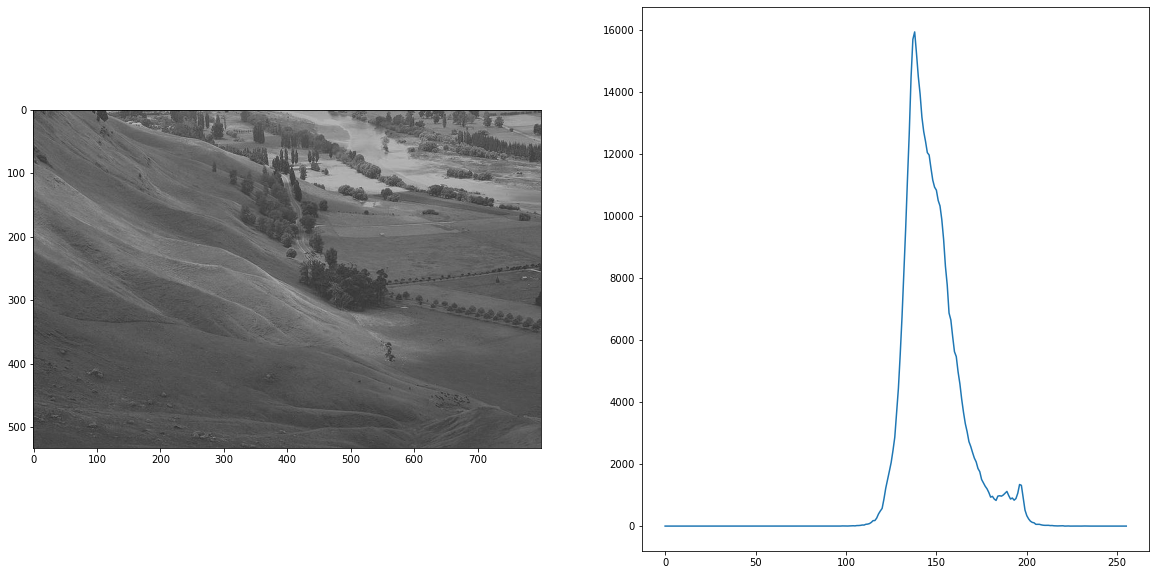

In [ ]:
reg_image = cv2.imread('images/Hawkes_Bay_NZ.jpg')
reg_image = cv2.cvtColor(reg_image, cv2.COLOR_BGR2GRAY)
reg_hist = cv2.calcHist([reg_image], [0], None, [256], [0, 256])

equ_image = equalizer(reg_image)
equ_hist = cv2.calcHist([equ_image], [0], None, [256], [0, 256])

# Image plots and graphs
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10))

ax1.imshow(reg_image, cmap='gray')
ax2.plot(reg_hist)

ax3.imshow(equ_image, cmap='gray')
ax4.plot(equ_hist)

In [ ]:
# TODO: Compare your results with the OpenCV implementation of histogram equalization. 
# Plot the histogram of the equalized image with your implementation and the histogram of the equalized image with OpenCV's implementation.

cv2_image = cv2.imread('images/Hawkes_Bay_NZ.jpg')
cv2_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2GRAY)
cv2_hist = cv2.equalizeHist([cv2_image], [0], None, [256], [0, 256])


equ_image = equalizer(reg_image)
equ_hist = cv2.calcHist([equ_image], [0], None, [256], [0, 256])

# Image plots and graphs
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.plot(cv2_hist)
ax2.plot(equ_hist)

In [ ]:
# TODO: Apply your function and do histogram equalization on a color image. Apply the equalization on an RGB image first. 
# Then on the HSV version of the image. Plot a figure with each resulting image. 
# NOTE: for Hue, the range of values goes from 0 to 180, while S and V, go from 0 to 255. 

color_image = cv2.imread('images/histogram_equalization/dog1.jpeg')
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# RGB image
equ_rgb = equalizer(color_image)
# HSV
hsv_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2HSV)
equ_hsv = equalizer(hsv_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(equ_rgb)
ax2.imshow(equ_hsv)

In [ ]:
# TODO: For each of the images of people in the image folder, apply histogram equalization, and then detect faces with haar cascades. 
# For each image, plot the result of the face detection without applying histogram equalization, and after applying histogram equalization. 

image_dir = "images/people/"

def load_dataset(image_dir):
    # Populate this empty image list
    im_list = []
        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
    for file in glob.glob(os.path.join(image_dir, "*")):
        # Read in the image
        im = cv2.imread(file)
        # Check if the image exists/if it's been correctly read-in
        if not im is None:
            # Append the image, and it's type (red, green, yellow) to the image list
            im_list.append(im)


    return im_list

# Read in the cascade classifiers for face
face_cascade = cv2.CascadeClassifier('../DATA / haarcascades / haarcascade_frontalface_default.xml')

def adjusted_detect_face(img):
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img,scaleFactor = 1.2, minNeighbors = 5)
     
    for (x, y, w, h) in face_rect:
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 10)
         
    return face_img

PPL_LIST = load_dataset(image_dir)

for i in PPL_LIST:
    face_im = adjusted_detect_face(i)
    equ_face = equalizer(face_im)

    print(face_im)
    print(equ_face)